In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("disasters_rensad.csv")

df_rensad = df[["Year", "Country", "Continent", "Disaster Type" ]]

df_rensad.to_csv("disasters_rensad.csv", index=False)

df_rensad.head(20)

,Year,Country,Continent,Disaster Type
0,1970,Argentina,Americas,Flood
1,1970,Australia,Oceania,Storm
2,1970,Benin,Africa,Flood
3,1970,Bangladesh,Asia,Storm
4,1970,Bangladesh,Asia,Storm
5,1970,Bangladesh,Asia,Flood
6,1970,Bangladesh,Asia,Storm
7,1970,Brazil,Americas,Drought
8,1970,Brazil,Americas,Flood
9,1970,Barbados,Americas,Flood


C:\Users\Test\AppData\Local\Temp\ipykernel_13928\4120844445.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, x_data, y_data, maxfev=10000)


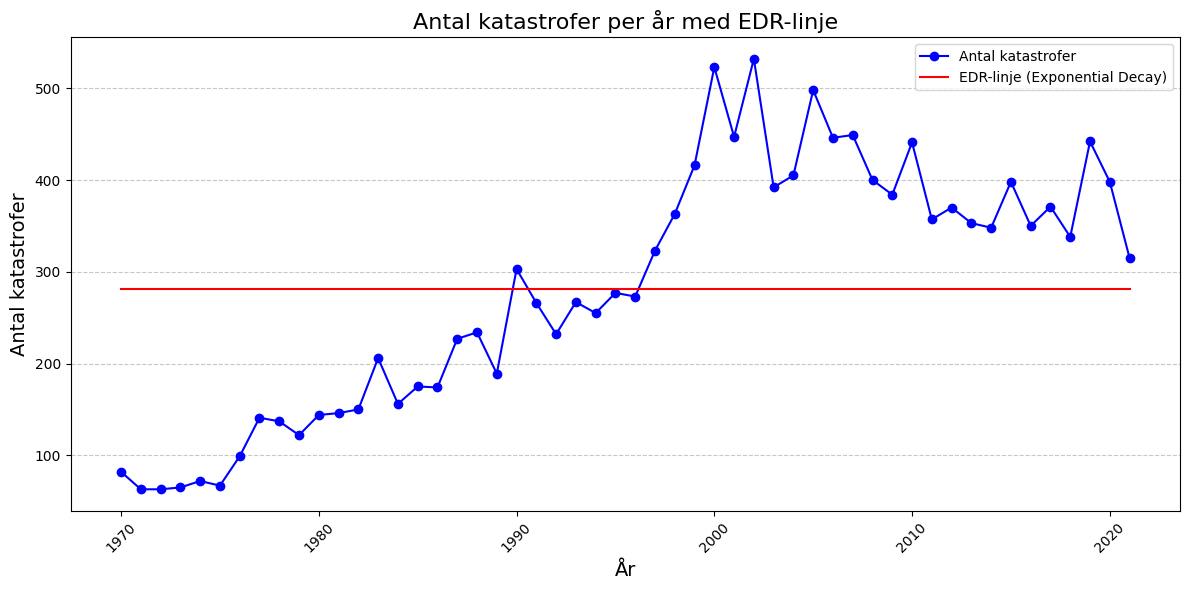

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Läs in CSV-filen
df = pd.read_csv("disasters_rensad.csv")

# Räkna antal katastrofer per år
disasters_per_year = df.groupby("Year").size().reset_index(name="Count")

# Definiera en exponentiell funktion för EDR
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Förbered data för kurvanpassning
x_data = disasters_per_year["Year"].astype(float)
y_data = disasters_per_year["Count"]

# Anpassa kurvan
popt, _ = curve_fit(exponential_decay, x_data, y_data, maxfev=10000)

# Skapa ett linjediagram
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, marker="o", linestyle="-", color="blue", label="Antal katastrofer")

# Lägg till EDR-linjen
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = exponential_decay(x_fit, *popt)
plt.plot(x_fit, y_fit, color="red", label="EDR-linje (Exponential Decay)")

# Diagraminställningar
plt.title("Antal katastrofer per år med EDR-linje", fontsize=16)
plt.xlabel("År", fontsize=14)
plt.ylabel("Antal katastrofer", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()

# Visa diagrammet
plt.show()